In [380]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from datetime import datetime
from scipy.stats import linregress
from citipy import citipy
pd.options.display.float_format = '{:,.0f}'.format
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [381]:
visitor_path = "Data/changes-visitors-covid.csv"
covid_path = "Data/covid-data.csv"
debt_path = "Data/debt-relief-covid.csv"
income_path = "Data/income-support-covid.csv"
face_path = "Data/face-covering-policies-covid.csv"
travel_path = "Data/international-travel-covid.csv"
school_path = "Data/school-closures-covid.csv"


In [382]:
visitor_data = pd.read_csv(visitor_path)
covid_data = pd.read_csv(covid_path)
debt_data = pd.read_csv(debt_path)
income_data = pd.read_csv(income_path)
face_data = pd.read_csv(face_path)
travel_data = pd.read_csv(travel_path)
school_data = pd.read_csv(school_path)


In [383]:
# visitor_data.head()

In [384]:
covid_data.location.nunique()

230

In [385]:
# covid_data.location.unique().tolist()

In [386]:
# continent = ['North America','South America','Africa','Asia','Europe']

In [387]:
# removing continents from data frame
# covid_data[~covid_data.location.isin(continent)]

In [388]:
# covid_data.info

In [389]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1,1,nan,nan,nan,nan,...,nan,597,10,nan,nan,38,0,65,1,nan
1,AFG,Asia,Afghanistan,2020-02-25,1,0,nan,nan,nan,nan,...,nan,597,10,nan,nan,38,0,65,1,nan
2,AFG,Asia,Afghanistan,2020-02-26,1,0,nan,nan,nan,nan,...,nan,597,10,nan,nan,38,0,65,1,nan
3,AFG,Asia,Afghanistan,2020-02-27,1,0,nan,nan,nan,nan,...,nan,597,10,nan,nan,38,0,65,1,nan
4,AFG,Asia,Afghanistan,2020-02-28,1,0,nan,nan,nan,nan,...,nan,597,10,nan,nan,38,0,65,1,nan


In [390]:
# covid_data.dtypes

In [391]:
# getting data for the desired counties as a data frame
au_data = covid_data[covid_data.location == "Australia"]
usa_data = covid_data[covid_data.location == "United States"]
ind_data = covid_data[covid_data.location == "India"]
chn_data = covid_data[covid_data.location == "China"]
uk_data = covid_data[covid_data.location == "United Kingdom"]
bz_data = covid_data[covid_data.location == "Brazil"]
kr_data = covid_data[covid_data.location == "South Korea"]

In [392]:
# makig a list of the countries data frame and then concat them into a data frame.
frames = [au_data,usa_data,ind_data,chn_data,uk_data,bz_data,kr_data]
country_df = pd.concat(frames)
country_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
5038,AUS,Oceania,Australia,2020-01-26,4,4,nan,nan,nan,nan,...,0,108,5,13,16,nan,4,83,1,6
5039,AUS,Oceania,Australia,2020-01-27,5,1,nan,nan,nan,nan,...,0,108,5,13,16,nan,4,83,1,nan
5040,AUS,Oceania,Australia,2020-01-28,5,0,nan,nan,nan,nan,...,0,108,5,13,16,nan,4,83,1,nan
5041,AUS,Oceania,Australia,2020-01-29,6,1,nan,nan,nan,nan,...,0,108,5,13,16,nan,4,83,1,nan
5042,AUS,Oceania,Australia,2020-01-30,9,3,nan,nan,nan,nan,...,0,108,5,13,16,nan,4,83,1,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80973,KOR,Asia,South Korea,2021-06-12,"147,874",452,532,"1,985",3,2,...,0,86,7,6,41,nan,12,83,1,nan
80974,KOR,Asia,South Korea,2021-06-13,"148,273",399,519,"1,988",3,2,...,0,86,7,6,41,nan,12,83,1,nan
80975,KOR,Asia,South Korea,2021-06-14,"148,647",374,508,"1,992",4,2,...,0,86,7,6,41,nan,12,83,1,nan
80976,KOR,Asia,South Korea,2021-06-15,"149,191",544,500,"1,993",1,2,...,0,86,7,6,41,nan,12,83,1,nan


In [393]:
# making dataframe for for income for the required countries
au_inc = income_data[income_data.Entity == "Australia"]
usa_inc = income_data[income_data.Entity == "United States"]
ind_inc = income_data[income_data.Entity == "India"]
chn_inc = income_data[income_data.Entity == "China"]
uk_inc = income_data[income_data.Entity == "United Kingdom"]
bz_inc = income_data[income_data.Entity == "Brazil"]
kr_inc = income_data[income_data.Entity == "South Korea"]
# au_inc

In [394]:
# making list of data frames and then contacting them 
frames_inc = [au_inc,usa_inc,ind_inc,chn_inc,uk_inc,bz_inc,kr_inc]
country_inc = pd.concat(frames_inc)
country_inc

,Entity,Code,Day,income_support
3663,Australia,AUS,2020-01-01,0
3664,Australia,AUS,2020-01-02,0
3665,Australia,AUS,2020-01-03,0
3666,Australia,AUS,2020-01-04,0
3667,Australia,AUS,2020-01-05,0
...,...,...,...,...
79320,South Korea,KOR,2021-06-10,1
79321,South Korea,KOR,2021-06-11,1
79322,South Korea,KOR,2021-06-12,1
79323,South Korea,KOR,2021-06-13,1


In [395]:
# combinig all covid data and income data into a single dataframe.
con_cov_inc = pd.merge(country_df,country_inc , left_on=["iso_code", "date"],right_on=['Code','Day'])
con_cov_inc

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Entity,Code,Day,income_support
0,AUS,Oceania,Australia,2020-01-26,4,4,nan,nan,nan,nan,...,16,nan,4,83,1,6,Australia,AUS,2020-01-26,0
1,AUS,Oceania,Australia,2020-01-27,5,1,nan,nan,nan,nan,...,16,nan,4,83,1,nan,Australia,AUS,2020-01-27,0
2,AUS,Oceania,Australia,2020-01-28,5,0,nan,nan,nan,nan,...,16,nan,4,83,1,nan,Australia,AUS,2020-01-28,0
3,AUS,Oceania,Australia,2020-01-29,6,1,nan,nan,nan,nan,...,16,nan,4,83,1,nan,Australia,AUS,2020-01-29,0
4,AUS,Oceania,Australia,2020-01-30,9,3,nan,nan,nan,nan,...,16,nan,4,83,1,nan,Australia,AUS,2020-01-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,KOR,Asia,South Korea,2021-06-10,"146,859",556,572,"1,981",2,2,...,41,nan,12,83,1,nan,South Korea,KOR,2021-06-10,1
3432,KOR,Asia,South Korea,2021-06-11,"147,422",563,547,"1,982",1,2,...,41,nan,12,83,1,nan,South Korea,KOR,2021-06-11,1
3433,KOR,Asia,South Korea,2021-06-12,"147,874",452,532,"1,985",3,2,...,41,nan,12,83,1,nan,South Korea,KOR,2021-06-12,1
3434,KOR,Asia,South Korea,2021-06-13,"148,273",399,519,"1,988",3,2,...,41,nan,12,83,1,nan,South Korea,KOR,2021-06-13,1


In [396]:
gross_df = con_cov_inc[["iso_code","location","date","new_cases","total_deaths","income_support"]]
gross_df.loc[:,'date'] = pd.to_datetime(gross_df.loc[:,'date']).dt.to_period('M')
gross_df.dropna(inplace=True)
gross_df = gross_df.reset_index(drop=True)
gross_df

/Users/jsb/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-396-294bd3b572a8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,location,date,new_cases,total_deaths,income_support
0,AUS,Australia,2020-03,2,1,0
1,AUS,Australia,2020-03,3,1,0
2,AUS,Australia,2020-03,9,1,0
3,AUS,Australia,2020-03,13,2,0
4,AUS,Australia,2020-03,3,2,0
...,...,...,...,...,...,...
3231,KOR,South Korea,2021-06,556,"1,981",1
3232,KOR,South Korea,2021-06,563,"1,982",1
3233,KOR,South Korea,2021-06,452,"1,985",1
3234,KOR,South Korea,2021-06,399,"1,988",1


In [397]:
# seeing if all the data is available for all the countries for the dates given
sort_values= gross_df.groupby(["date"])["location"].nunique()
# sort_values

In [398]:
# removing rows from month_date column which doesn't have values for all the countries.
clean_df = gross_df
clean_df

,iso_code,location,date,new_cases,total_deaths,income_support
0,AUS,Australia,2020-03,2,1,0
1,AUS,Australia,2020-03,3,1,0
2,AUS,Australia,2020-03,9,1,0
3,AUS,Australia,2020-03,13,2,0
4,AUS,Australia,2020-03,3,2,0
...,...,...,...,...,...,...
3231,KOR,South Korea,2021-06,556,"1,981",1
3232,KOR,South Korea,2021-06,563,"1,982",1
3233,KOR,South Korea,2021-06,452,"1,985",1
3234,KOR,South Korea,2021-06,399,"1,988",1


In [429]:
df = clean_df.groupby(["date"],as_index=False)["new_cases"].sum()
df

,date,new_cases
0,2020-01,"9,242"
1,2020-02,"72,598"
2,2020-03,"251,128"
3,2020-04,"1,148,245"
4,2020-05,"1,381,172"
5,2020-06,"2,155,764"
6,2020-07,"4,327,408"
7,2020-08,"4,748,843"
8,2020-09,"4,855,736"
9,2020-10,"5,089,233"


In [399]:
clean_df["iso_code"].value_counts()

CHN    509
KOR    481
AUS    461
GBR    456
USA    449
IND    447
BRA    433
Name: iso_code, dtype: int64

In [446]:
inc_supp = clean_df.groupby(["location","date"],as_index=False)["income_support"].min()
inc_supp

,location,date,income_support
0,Australia,2020-03,0
1,Australia,2020-04,1
2,Australia,2020-05,1
3,Australia,2020-06,1
4,Australia,2020-07,1
...,...,...,...
108,United States,2021-01,2
109,United States,2021-02,2
110,United States,2021-03,2
111,United States,2021-04,2


In [426]:
new_case = clean_df.groupby(["location"],as_index=False)["new_cases"].sum()
new_case

,location,new_cases
0,Australia,"30,132"
1,Brazil,"16,083,058"
2,China,"90,975"
3,India,"28,174,988"
4,South Korea,"148,616"
5,United Kingdom,"4,521,627"
6,United States,"33,108,274"


In [412]:
type(new_case["date"])

pandas.core.series.Series

In [407]:
new_case.loc[:,"new_cases"]

0         4,534
1         2,207
2           436
3           718
4         9,360
         ...   
108   6,149,098
109   2,402,013
110   1,813,675
111   1,885,731
112     757,530
Name: new_cases, Length: 113, dtype: float64

In [450]:
# fig,ax = plt.subplots(figsize=(15,10))
# countries = ['Australia', 'United States', 'India', 'China', 'United Kingdom', 'Brazil', 'South Korea']
# for country in countries:
#     monthly_new_cases = clean_df[(clean_df["location"] == country)].groupby(['date'])['new_cases'].sum()
#     income_support = clean_df[(clean_df["location"] == country)].groupby(['date'])['income_support'].max()

#     ax.set_ylabel("Monthly New Cases")
#     ax.plot(monthly_new_cases, label = country)
    
# ax.set_ylabel('Monthly New Cases')
# ax.set_title('New Cases Per month')
# ax.legend()
# plt.xticks(rotation=45)
# # plt.savefig("output/new_cases_7_each_country_line_plot.png")
# plt.show()

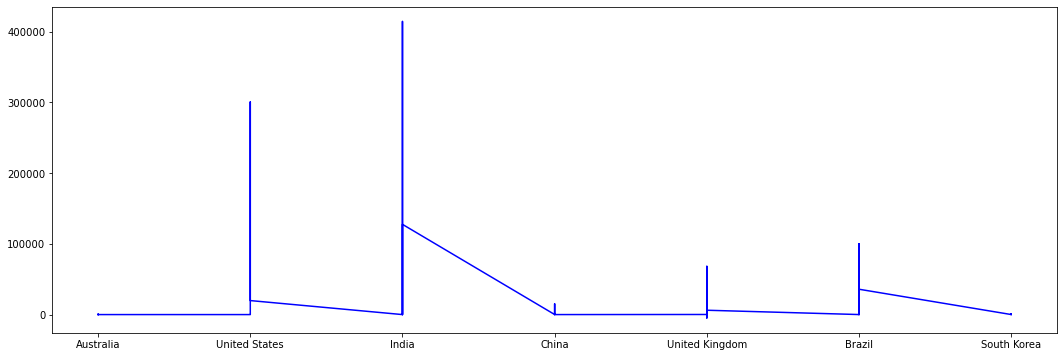

In [449]:
# pd.plotting.deregister_matplotlib_converters()
plt.figure(figsize=(18,6))
plt.plot(clean_df.loc[:,"location"],clean_df.loc[:,"new_cases"],color="blue",label="new cases")
# plt.plot(clean_df.loc[:,"date"],clean_df.loc[:,"date"],color="red",label="new cases")
         

ValueError: Illegal format string "y_values"; two marker symbols

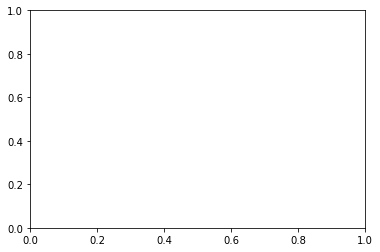

In [452]:
# multiple line plots
x_values = clean_df.groupby(["location"])["date"].unique()
# x_values
y_values = clean_df.groupby(["location"])["new_cases"].sum()
# y_values
plt.plot( 'x_values', 'y_values', data=new_cases, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# show legend
plt.legend()

# show graph
plt.show()

In [405]:
# fig,ax = plt.subplots(figsize=(15,10))
# # countries = ['Australia', 'United States', 'India', 'China', 'United Kingdom', 'Brazil', 'South Korea']
# # for country in countries:
# monthly_new_cases = new_cases[(new_cases["location"] == "Australia")].groupby(['date'])['new_cases'].sum()
# # type(monthly_new_cases)
# ax.bar(new_cases[(new_cases["location"] == "Australia")]['date'].unique(), monthly_new_cases, label = country)
    
# ax.set_ylabel('Monthly New Cases')
# ax.set_title('New Cases Per month')
# ax.legend()
# plt.xticks(rotation=45)
# # plt.savefig("output/new_cases_7_each_country_barplot.png")
# plt.show()

In [93]:
# # making data frame with selected columns
# country_df = country_df[["iso_code","location","date","total_cases","new_cases","total_deaths"]]
# country_df['month_year'] = pd.to_datetime(country_df['date']).dt.to_period('M')
# country_df = country_df.drop(columns=['date'])
# country_df.dropna(inplace=True)
# country_df = country_df.reset_index(drop=True)
# country_df.sort_values(by=['month_year'])
# country_df

In [94]:
# country_df.groupby(["month_year"])["location"].nunique()

In [95]:
# # removing rows from month_date column which doesn't have values for all the countries.
# complete_country = country_df.loc[(country_df["month_year"]!="2020-01") & (country_df["month_year"]!="2020-02") ] 
# complete_country

In [96]:
# country_clean = complete_country.groupby(["location","month_year"])[["total_cases","new_cases","total_deaths"]].sum()
# clean_country = country_clean.reset_index()
# clean_country

In [97]:
# # making dataframe for for income for the required countries
# au_inc = income_data[income_data.Entity == "Australia"]
# usa_inc = income_data[income_data.Entity == "United States"]
# ind_inc = income_data[income_data.Entity == "India"]
# chn_inc = income_data[income_data.Entity == "China"]
# uk_inc = income_data[income_data.Entity == "United Kingdom"]
# bz_inc = income_data[income_data.Entity == "Brazil"]
# kr_inc = income_data[income_data.Entity == "South Korea"]
# au_inc

In [84]:
# making list of data frames and then contacting them 
frames_inc = [au_inc,usa_inc,ind_inc,chn_inc,uk_inc,bz_inc,kr_inc]
country_inc = pd.concat(frames_inc)
# country_inc['month_year'] = pd.to_datetime(country_inc['Day']).dt.to_period('M')
# country_inc = country_inc.drop(columns=['Day'])
country_inc.dropna(inplace=True)
country_inc = country_inc.reset_index(drop=True)
# country_inc.sort_values(by=['month_year'])
country_inc
# country_inc.groupby(["month_year"])["Entity"].nunique()

,Entity,Code,Day,income_support
0,Australia,AUS,2020-01-01,0
1,Australia,AUS,2020-01-02,0
2,Australia,AUS,2020-01-03,0
3,Australia,AUS,2020-01-04,0
4,Australia,AUS,2020-01-05,0
...,...,...,...,...
3633,South Korea,KOR,2021-06-10,1
3634,South Korea,KOR,2021-06-11,1
3635,South Korea,KOR,2021-06-12,1
3636,South Korea,KOR,2021-06-13,1


In [101]:
# # removing rows from month_date column which doesn't have values for all the countries.
# complete_country_inc = country_inc.loc[(country_inc["month_year"]!="2021-06")] 
# # complete_country_inc

In [86]:
rename_country_inc = complete_country_inc.rename(columns={'Entity': 'location'})
rename_country_inc

,location,Code,income_support,month_year
0,Australia,AUS,0,2020-01
1,Australia,AUS,0,2020-01
2,Australia,AUS,0,2020-01
3,Australia,AUS,0,2020-01
4,Australia,AUS,0,2020-01
...,...,...,...,...
3619,South Korea,KOR,1,2021-05
3620,South Korea,KOR,1,2021-05
3621,South Korea,KOR,1,2021-05
3622,South Korea,KOR,1,2021-05


In [87]:
rename_inc = rename_country_inc.loc[(rename_country_inc["month_year"]!="2020-01") & (rename_country_inc["month_year"]!="2020-02") ] 
rename_inc

,location,Code,income_support,month_year
60,Australia,AUS,0,2020-03
61,Australia,AUS,0,2020-03
62,Australia,AUS,0,2020-03
63,Australia,AUS,0,2020-03
64,Australia,AUS,0,2020-03
...,...,...,...,...
3619,South Korea,KOR,1,2021-05
3620,South Korea,KOR,1,2021-05
3621,South Korea,KOR,1,2021-05
3622,South Korea,KOR,1,2021-05


In [88]:
final_data = pd.merge(complete_country,rename_inc, how="outer", on=["location", "month_year"])
final_data

,iso_code,location,total_cases,new_cases,total_deaths,month_year,Code,income_support
0,AUS,Australia,27.0,2.0,1.0,2020-03,AUS,0.0
1,AUS,Australia,27.0,2.0,1.0,2020-03,AUS,0.0
2,AUS,Australia,27.0,2.0,1.0,2020-03,AUS,0.0
3,AUS,Australia,27.0,2.0,1.0,2020-03,AUS,0.0
4,AUS,Australia,27.0,2.0,1.0,2020-03,AUS,0.0
...,...,...,...,...,...,...,...,...
96150,KOR,South Korea,147874.0,452.0,1985.0,2021-06,NaN,NaN
96151,KOR,South Korea,148273.0,399.0,1988.0,2021-06,NaN,NaN
96152,KOR,South Korea,148647.0,374.0,1992.0,2021-06,NaN,NaN
96153,KOR,South Korea,149191.0,544.0,1993.0,2021-06,NaN,NaN


In [89]:
new = pd.merge(country_df,country_inc , left_on=["iso_code", "date"],right_on=['Code','Day'])
new

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Entity,Code,Day,income_support
0,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,...,16.5,NaN,3.84,83.44,0.944,6.16,Australia,AUS,2020-01-26,0
1,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,...,16.5,NaN,3.84,83.44,0.944,NaN,Australia,AUS,2020-01-27,0
2,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,...,16.5,NaN,3.84,83.44,0.944,NaN,Australia,AUS,2020-01-28,0
3,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,...,16.5,NaN,3.84,83.44,0.944,NaN,Australia,AUS,2020-01-29,0
4,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,...,16.5,NaN,3.84,83.44,0.944,NaN,Australia,AUS,2020-01-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,KOR,Asia,South Korea,2021-06-10,146859.0,556.0,572.429,1981.0,2.0,1.714,...,40.9,NaN,12.27,83.03,0.916,NaN,South Korea,KOR,2021-06-10,1
3432,KOR,Asia,South Korea,2021-06-11,147422.0,563.0,546.571,1982.0,1.0,1.571,...,40.9,NaN,12.27,83.03,0.916,NaN,South Korea,KOR,2021-06-11,1
3433,KOR,Asia,South Korea,2021-06-12,147874.0,452.0,531.714,1985.0,3.0,1.714,...,40.9,NaN,12.27,83.03,0.916,NaN,South Korea,KOR,2021-06-12,1
3434,KOR,Asia,South Korea,2021-06-13,148273.0,399.0,519.429,1988.0,3.0,2.000,...,40.9,NaN,12.27,83.03,0.916,NaN,South Korea,KOR,2021-06-13,1


In [189]:
# covid_data.head()
# covid_df = round(covid_data.groupby(["location"])["total_cases"].max(),2)
# # type(covid_df)
# covid_df.dropna(inplace=True)
# covid_df

In [190]:
# afg_data = covid_data[covid_data.location == "Afghanistan"].describe()
# afg_data

In [191]:
afg_data['month_year'] = pd.to_datetime(afg_data['date']).dt.to_period('M')
afg_data.head()

<ipython-input-191-fb8835b80fff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,month_year
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2020-02
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2020-02
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2020-02
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2020-02
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,2020-02


In [192]:
# afg_df = afg_data.groupby(["month_year"])[["location","total_cases","new_cases","month_year"]].max()
# afg_df

In [193]:
# afg_df.reset_index(drop=True, inplace=True)
# afg_df

In [194]:
# total_new_cases= afg_data.groupby(["month_year"])["new_cases"].sum()
# total_new_cases

In [195]:
# total_death= afg_data.groupby(["month_year"])["total_deaths"].sum()
# total_death

In [196]:
# merge_data = pd.DataFrame({"total_death":total_death, "total_new_cases": total_new_cases})
# merge_data.reset_index(drop=False, inplace=True)
# merge_data

In [197]:
# afg_df.reset_index(drop=True, inplace=True)
# afg_df

In [198]:
# month_year = afg_df["month_year"]
# afg_df

In [199]:
# merge_data["month_year"] = month_year
# merge_data.reset_index(drop=True, inplace=True)

In [200]:
# merge_afg = pd.merge(merge_data, afg_df, on = "month_year")
# merge_afg


In [201]:
!pip install plotly.express

In [202]:
merge_afg.dtypes

month_year         period[M]
total_death          float64
total_new_cases      float64
location              object
total_cases          float64
new_cases            float64
month_year_str        object
dtype: object

In [203]:
merge_afg["month_year_str"] = merge_afg.month_year.astype('str')

In [192]:
# # use color as third subset for countries
# import plotly.express as px
# # df = px.data.gapminder().query("continent=='Oceania'")
# fig = px.line(merge_afg, x="month_year_str", y="total_new_cases")
# fig = px.line(merge_afg, x="month_year_str", y="total_death")
# fig.show()

In [205]:
covid_data[covid_data.total_cases == 93288.000000]


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
478,AFG,Asia,Afghanistan,2021-06-16,93288.0,16.0,1319.714,3683.0,0.0,54.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
15685,CAN,North America,Canada,2020-06-01,93288.0,809.0,881.286,7952.0,46.0,76.0,...,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN


In [206]:
len(covid_data)

96208

In [207]:
debt_data.head()

,Entity,Code,Day,debt_relief
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0


In [208]:
income_data.head()


,Entity,Code,Day,income_support
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0


In [209]:
income_afg = income_data[income_data.Entity == "Afghanistan"]
income_afg

,Entity,Code,Day,income_support
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
...,...,...,...,...
508,Afghanistan,AFG,2021-06-09,0
509,Afghanistan,AFG,2021-06-10,0
510,Afghanistan,AFG,2021-06-11,0
511,Afghanistan,AFG,2021-06-12,0


In [210]:
income_afg['month_year'] = pd.to_datetime(income_afg['Day']).dt.to_period('M')
income_afg.head()

<ipython-input-210-c8bc48e76437>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Entity,Code,Day,income_support,month_year
0,Afghanistan,AFG,2020-01-01,0,2020-01
1,Afghanistan,AFG,2020-01-02,0,2020-01
2,Afghanistan,AFG,2020-01-03,0,2020-01
3,Afghanistan,AFG,2020-01-04,0,2020-01
4,Afghanistan,AFG,2020-01-05,0,2020-01


In [211]:
income_df = income_afg.groupby(["month_year"])[["Entity","income_support","month_year"]].max()

income_df.reset_index(drop=True, inplace=True)
income_df

,Entity,income_support,month_year
0,Afghanistan,0,2020-01
1,Afghanistan,0,2020-02
2,Afghanistan,0,2020-03
3,Afghanistan,0,2020-04
4,Afghanistan,0,2020-05
5,Afghanistan,0,2020-06
6,Afghanistan,0,2020-07
7,Afghanistan,0,2020-08
8,Afghanistan,0,2020-09
9,Afghanistan,0,2020-10


In [212]:
agf_2_income = pd.merge(merge_afg,income_df, on = "month_year")
agf_2_income.drop(['Entity','month_year'], axis=1)

,total_death,total_new_cases,location,total_cases,new_cases,month_year_str,income_support
0,0.0,1.0,Afghanistan,1.0,1.0,2020-02,0
1,27.0,174.0,Afghanistan,175.0,33.0,2020-03,0
2,890.0,1952.0,Afghanistan,2127.0,187.0,2020-04,0
3,5007.0,13081.0,Afghanistan,15208.0,866.0,2020-05,0
4,15016.0,16299.0,Afghanistan,31507.0,915.0,2020-06,0
5,33518.0,5158.0,Afghanistan,36665.0,348.0,2020-07,0
6,42101.0,1494.0,Afghanistan,38159.0,108.0,2020-08,0
7,42987.0,1109.0,Afghanistan,39268.0,125.0,2020-09,0
8,46287.0,2157.0,Afghanistan,41425.0,141.0,2020-10,0
9,49133.0,4849.0,Afghanistan,46274.0,282.0,2020-11,0


In [213]:
# income_afg["month_year_str"] = income_afg.month_year.astype('str')

In [214]:
# # use color as third subset for countries
# import plotly.express as px
# # df = px.data.gapminder().query("continent=='Oceania'")
# fig = px.line(merge_afg, x="month_year_str", y="total_new_cases")
# fig.show()

In [215]:

# income_df = round(income_data.groupby(["Entity"])["income_support"].mean(),2)
# income_df
# # income_df.sort_values(ascending = False)

In [216]:
# df = income_data.set_index("Entity")

# # df = income_data.loc["Afghanistan"]
# df_income = df.loc["Bulgaria"]
# df_income["income_support"].sort_values(ascending = False)

In [217]:
# face_data.head()

In [218]:
# travel_data.head()

In [219]:
# school_data.head()
